In [77]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd
import sys

In [44]:
def isComplete(G):
    n = len(G.nodes())
    return len(G.edges) == (n*(n-1))/2

In [38]:
def choose(p):
    return random.random() < p

def draw(G, node_color="lightblue", edge_color = "black"):
    pos=nx.spring_layout(G)
    plt.figure(figsize=(20,20))
    nx.draw(G, pos, with_labels=True, node_color=node_color, edge_color=edge_color, node_size=500)
    plt.show()

In [48]:
# choose the node to which attach the new edge
def choose_attachment(G, event="node_event"):

    # calculate the probability of a node to be chosen (deg(v)^beta)/(sum_v(deg(v)^beta))
    prob = {}
    for n in G.nodes():
        deg_n = len(G.edges(n))
        
        tot_deg = sum([ pow(len(G.edges(i)), BETA) for i in G.nodes()])
        if(n!=N or event=="edge_event"):
            prob[n] = pow(deg_n, BETA)/tot_deg
                
   #print(prob)
    # extract a node 
    done = False
    while(not done):
        for n in G.nodes():
            if(n!=N or event=="edge_event"):
                if(choose(prob[n])):
                    return n

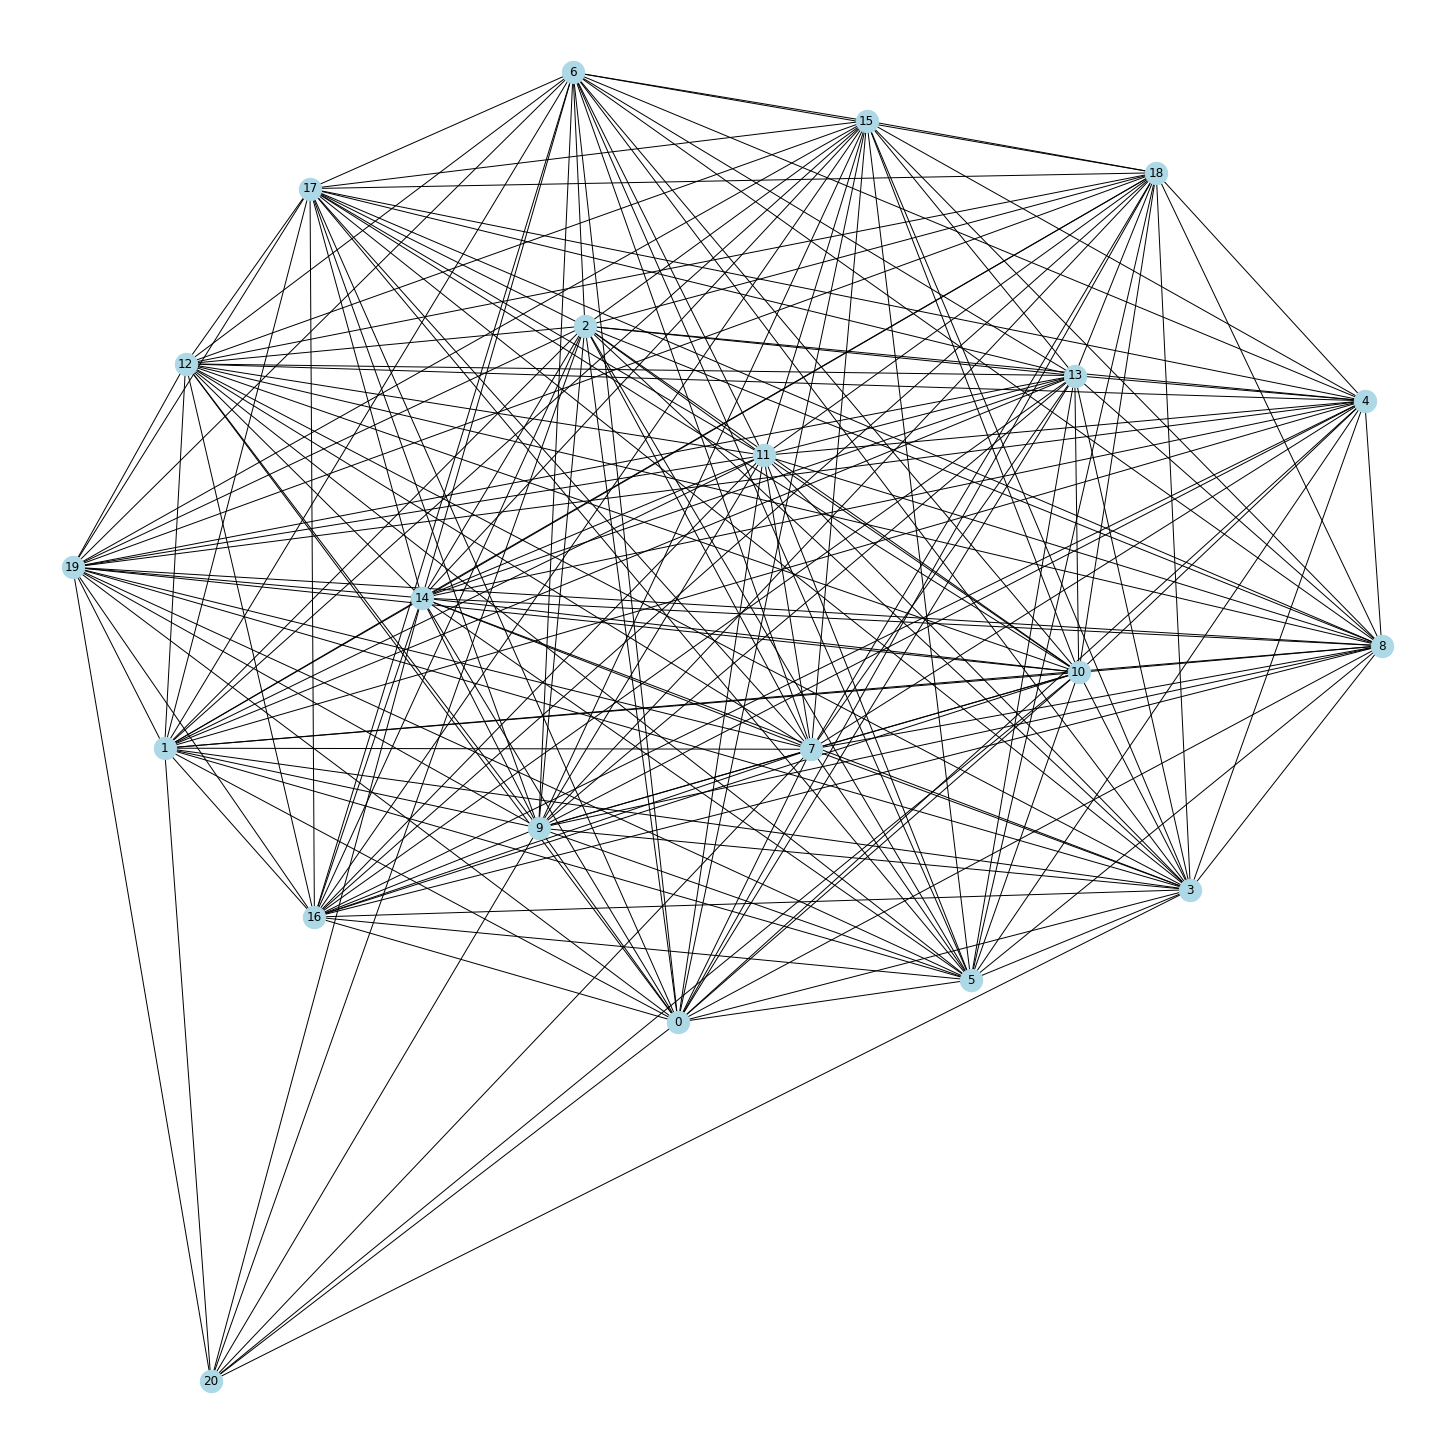

In [89]:
NUM_EVENTS = 200
BETA=0.5

Graphs = []  
G = nx.Graph()

# create the startin graph
G.add_node(0)
Graphs.append(G.copy())
G.add_node(1)
G.add_edge(0, 1)
Graphs.append(G.copy())

N = 2 # next node label

for e in range(NUM_EVENTS-2):
    
    if(choose(0) or isComplete(G)):
        # node_event
        G.add_node(N)
        
        n1 = choose_attachment(G)
        G.add_edge(N, n1)
        
        #print("node event", N, n1)
        N += 1
        

    else:
        # edge_event
        n1, n2 = 0, 0
        
        while(n1==n2 or (n1,n2) in G.edges()):
            n1 = choose_attachment(G, "edge_event")
            n2 = choose_attachment(G, "edge_event")            
            
        G.add_edge(n1, n2)
        
        #print("edge event", n1, n2)
        
    Graphs.append(G.copy())
        
draw(G)

In [90]:
# extract trajectories
df = pd.DataFrame()
event = 0
for curr_G in Graphs:

    col = [0 for i in range(len(G.nodes()))]
    for node, deg in curr_G.degree():
        col[node] = deg
    
    df[event] = col
    event += 1


/tmp/ipykernel_21213/2910245677.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[event] = col
/tmp/ipykernel_21213/2910245677.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[event] = col
/tmp/ipykernel_21213/2910245677.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[event] = col
/

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0,1,1,2,2,2,3,4,4,4,...,19,20,20,20,20,20,20,20,20,20
1,0,1,2,2,2,3,3,3,3,4,...,19,19,19,19,20,20,20,20,20,20
2,0,0,1,2,3,3,3,3,3,3,...,19,19,20,20,20,20,20,20,20,20
3,0,0,0,0,1,2,3,3,4,4,...,19,19,19,19,19,20,20,20,20,20
4,0,0,0,0,0,0,0,1,2,3,...,19,19,19,19,19,19,19,19,19,19
5,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19
6,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19
7,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,20,20,20,20
8,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19
9,0,0,0,0,0,0,0,0,0,0,...,19,19,19,20,20,20,20,20,20,20


In [91]:
df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0,1,1,2,2,2,3,4,4,4,...,19,20,20,20,20,20,20,20,20,20
1,0,1,2,2,2,3,3,3,3,4,...,19,19,19,19,20,20,20,20,20,20
2,0,0,1,2,3,3,3,3,3,3,...,19,19,20,20,20,20,20,20,20,20
3,0,0,0,0,1,2,3,3,4,4,...,19,19,19,19,19,20,20,20,20,20
4,0,0,0,0,0,0,0,1,2,3,...,19,19,19,19,19,19,19,19,19,19
5,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19
6,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19
7,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,20,20,20,20
8,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19
9,0,0,0,0,0,0,0,0,0,0,...,19,19,19,20,20,20,20,20,20,20
